In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file in your Google Drive
zip_path = "/content/drive/MyDrive/leapGestRecog.zip"

# Extract it to /content/leapGestRecog
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/leapGestRecog")

DATASET_PATH = "/content/leapGestRecog/leapGestRecog"  # Your folder is likely inside another after extraction


In [ ]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

IMG_SIZE = 64
NUM_CLASSES = 10

def load_dataset(base_path):
    data = []
    labels = []
    for person_folder in sorted(os.listdir(base_path)):
        person_path = os.path.join(base_path, person_folder)
        if not os.path.isdir(person_path):
            continue
        for gesture_folder in sorted(os.listdir(person_path)):
            gesture_path = os.path.join(person_path, gesture_folder)
            if not os.path.isdir(gesture_path):
                continue
            label = int(gesture_folder.split('_')[0]) - 1
            for img_file in os.listdir(gesture_path):
                img_path = os.path.join(gesture_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    continue
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(img)
                labels.append(label)
    data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    labels = to_categorical(labels, num_classes=NUM_CLASSES)
    return train_test_split(data, labels, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = load_dataset(DATASET_PATH)
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (16000, 64, 64, 1)
Testing samples: (4000, 64, 64, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6724 - loss: 0.9975 - val_accuracy: 0.9922 - val_loss: 0.0263
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9767 - loss: 0.0740 - val_accuracy: 0.9981 - val_loss: 0.0045
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9878 - loss: 0.0362 - val_accuracy: 0.9997 - val_loss: 0.0014
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9918 - loss: 0.0242 - val_accuracy: 0.9994 - val_loss: 0.0017
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 6.5001e-04
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9953 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 1.9330e-04
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 7.3234e-05
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9946 - loss: 0.0167 - val_

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0101
Test Accuracy: 1.00


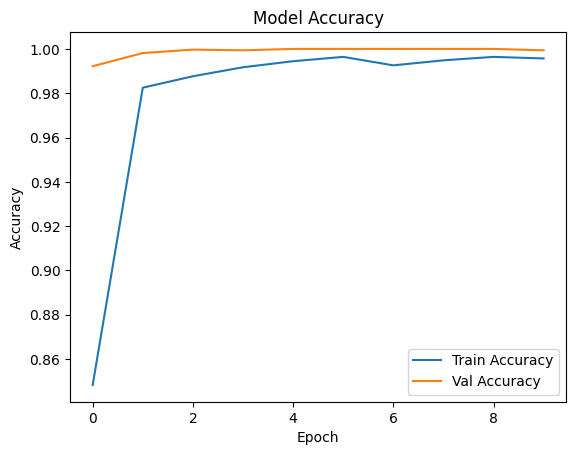

In [ ]:
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
!pip install opencv-python tensorflow

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


In [ ]:
model.save("hand_gesture_model.h5")